In [110]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [111]:
def bilateral_filtering(img,sigma_d,sigma_r,fil_size=3,padding=True,s=1):
    img = img.astype(np.float64)
    if padding:
        pad_size = fil_size//2
        img = np.pad(img,(pad_size,pad_size),mode='constant')

    h,w = img.shape[0],img.shape[1]
    
    rows = (h - fil_size)//s +1
    cols = (w - fil_size)//s +1
    out = np.zeros((rows,cols))
    
    x = np.power(np.arange(fil_size) - fil_size//2,2)
    y = x.copy().reshape(fil_size,1)
    d = np.zeros((fil_size,fil_size))
    d[:,:] = np.exp(-(1/(2*sigma_d*sigma_d))*(y + x))
    
    for i in range(rows):
        for j in range(cols):
            curr = img[i:i+fil_size,j:j+fil_size]
            #calculate the filter
            r = curr.copy()
            r = np.exp((-1/(2*sigma_r*sigma_r))*(r - r[fil_size//2,fil_size//2]))

            
            fil = np.multiply(d,r)
            
            out[i,j] = np.sum(np.multiply(curr,fil))/np.sum(fil[:,:])

            
    return out.astype(np.uint8) 

def bilateral_filtering3d(img,sigma_d,sigma_r,fil_size=3,padding=True,s=1):
    out = np.zeros(img.shape)
    for i in range(3):
        out[:,:,i] = bilateral_filtering(img[:,:,i],sigma_d,sigma_r,fil_size,padding,s)
    
    return out.astype(np.uint8)

In [112]:
img = cv2.imread('.../A2_resources/sky.png')
gt = cv2.imread('.../A2_resources/gt_sky.png')

5906.669620014311


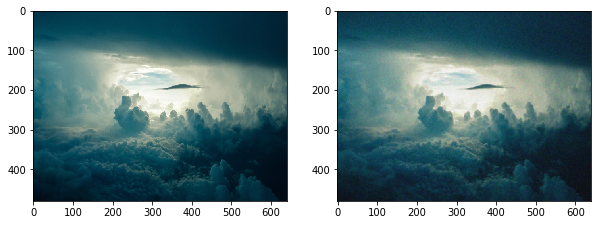

In [113]:
out = bilateral_filtering3d(img,10,10)
a = np.sum(np.power(out-gt,2))**(1/2)
print(a)
img_rgb = cv2.cvtColor(gt,cv2.COLOR_BGR2RGB)
out_rgb = cv2.cvtColor(out,cv2.COLOR_BGR2RGB)
fig = plt.figure()
fig.set_size_inches(10, 10)
fig.add_subplot(121)
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.imshow(out_rgb)
plt.show()
#5906.669620014311

In [114]:
img = cv2.cvtColor(cv2.imread('.../A2_resources/noir.png'),cv2.COLOR_BGR2GRAY)
gt = cv2.cvtColor(cv2.imread('.../A2_resources/gt_noir.png'),cv2.COLOR_BGR2GRAY)

3860.680639472786


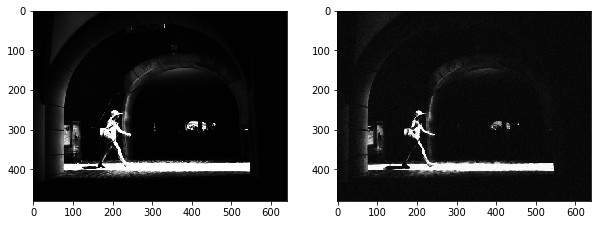

In [115]:
out = bilateral_filtering(img,0.5,0.5)
a = np.sum(np.power(out-gt,2))**(1/2)
print(a)
fig = plt.figure()
fig.set_size_inches(10, 10)
fig.add_subplot(121)
plt.imshow(gt,'gray')
plt.subplot(1,2,2)
plt.imshow(out,'gray')
plt.show()
#3860.680639472786